<a href="https://colab.research.google.com/github/24041511-a11y/probabilidad/blob/main/Unidad1/autos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de precios de automóviles
Este notebook realiza un análisis descriptivo del dataset de autos, incluyendo estadísticas básicas, histogramas y diagramas de caja.

![image](https:github.com/Jose-Gabriel-Rodriguez/Probabilidad/blob/main/Cintilla2025.png?raw+true)

# **Probabilidad y estadistica**

## **Unidad 1**

### **Practica 2. Maximo, minimo, Rango y dispersion de datos.**

### Docente: *Dr. Jose Gabriel Rodriguez Rivas*

### Alumno: David Zuñiga Rodriguez

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


## Cargar Dataset

In [5]:

df = pd.read_csv("/content/autos2.csv")
print("Columnas disponibles:", df.columns.tolist())
df.head()


Columnas disponibles: ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Seleccionar columna de precios

In [6]:

price_col = "price"  # ajustar si es necesario
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
df[price_col].head()


,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


## Estadísticas descriptivas básicas

In [7]:

prices = df[price_col].dropna()
print("Registros no nulos:", prices.count())
print("Precio mínimo:", prices.min())
print("Precio máximo:", prices.max())
print("Moda:", prices.mode().tolist())
print("Media:", prices.mean())
print("Mediana:", prices.median())
print("Desviación estándar:", prices.std())


Registros no nulos: 201
Precio mínimo: 5118.0
Precio máximo: 45400.0
Moda: [5572.0, 6229.0, 6692.0, 7295.0, 7609.0, 7775.0, 7898.0, 7957.0, 8495.0, 8845.0, 8921.0, 9279.0, 13499.0, 16500.0, 18150.0]
Media: 13207.129353233831
Mediana: 10295.0
Desviación estándar: 7947.066341939271


## Estadísticos y cuartiles con describe()

In [8]:
prices.describe()

,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000


## Histograma de precios (Regla de Sturges)

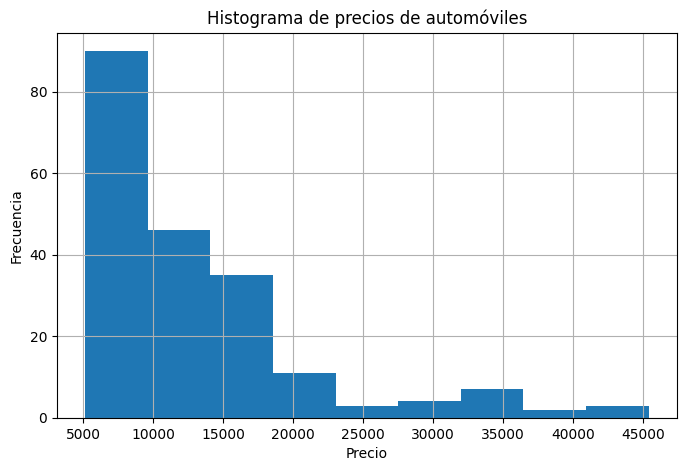

In [9]:

bins = math.ceil(np.log2(prices.count()) + 1)
plt.figure(figsize=(8,5))
plt.hist(prices, bins=bins)
plt.title("Histograma de precios de automóviles")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


## Diagrama de caja: Precio vs Body-Style

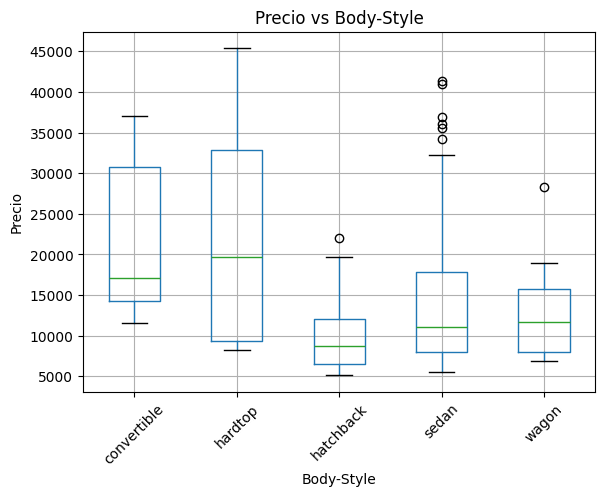

In [10]:

cat = "body-style"
if cat in df.columns:
    sub = df[[price_col, cat]].dropna()
    sub.boxplot(column=price_col, by=cat, rot=45)
    plt.title("Precio vs Body-Style")
    plt.suptitle("")
    plt.xlabel("Body-Style")
    plt.ylabel("Precio")
    plt.show()
else:
    print("Columna no encontrada:", cat)


## Diagrama de caja: Precio vs Drive-Wheels

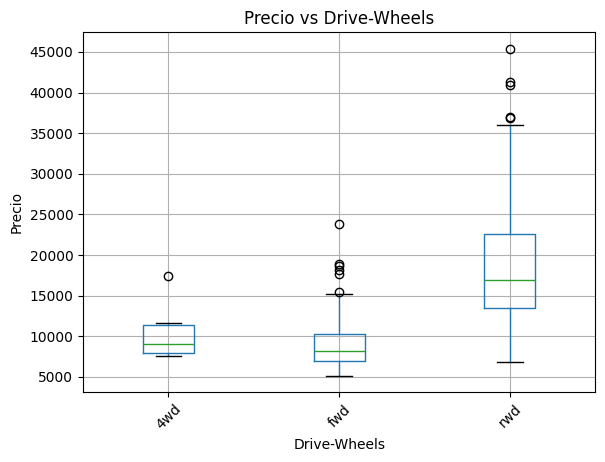

In [11]:

cat = "drive-wheels"
if cat in df.columns:
    sub = df[[price_col, cat]].dropna()
    sub.boxplot(column=price_col, by=cat, rot=45)
    plt.title("Precio vs Drive-Wheels")
    plt.suptitle("")
    plt.xlabel("Drive-Wheels")
    plt.ylabel("Precio")
    plt.show()
else:
    print("Columna no encontrada:", cat)


## Diagrama de caja: Precio vs Engine-Location

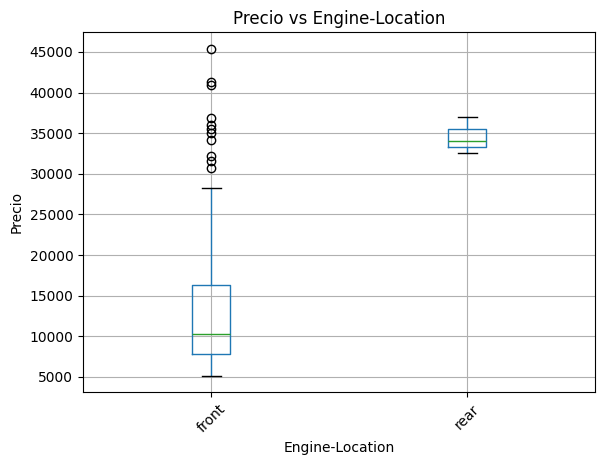

In [12]:

cat = "engine-location"
if cat in df.columns:
    sub = df[[price_col, cat]].dropna()
    sub.boxplot(column=price_col, by=cat, rot=45)
    plt.title("Precio vs Engine-Location")
    plt.suptitle("")
    plt.xlabel("Engine-Location")
    plt.ylabel("Precio")
    plt.show()
else:
    print("Columna no encontrada:", cat)


## Conclusiones Generales
- La distribución de precios presenta sesgo hacia la derecha, influenciada por autos de alto costo.
- La media es mayor que la mediana, reforzando la idea de precios extremos.
- Los diagramas de caja muestran diferencias claras de precios según el tipo de carrocería, tracción y ubicación del motor.
- Estos análisis permiten comprender mejor el mercado y pueden servir para construir modelos predictivos.